# Lab 0: A Tutorial and Introduction to TTM4133 Lab Design
TTM4133 labs are designed in order to enable the learners to explore different concepts of mobile cellular networks using the [ns-3](https://www.nsnam.org/docs/models/html/lte.html) simulator to design, simulate and analyze cellular topologies mainly using LTE and beyond generation of networks. However, ns-3 only a simulator so real packet captures from different procedures in cellular networks will be used. This will allow focusing on some of the missing features of simulation. <br>

## 1. Pre-Requisites:
The students should study the complete tutorial titled <u>**Getting Started With TTM4133 Labs**</u> that covers some basic concepts related to the labs.

## 2. Learning Goals
The goal of this lab is to experiment with the tools you are going to use in this course, and take a look at the type of data you will encounter. This consists of a simple graphical user interface (GUI) that takes your input and converts it to parameters which are passed to an ns-3 script, which runs the defined topology in a simulation.


After this lab, you will have an idea of what is to come, and how you should go about solving tasks in future labs.

The lab has several **milestones** and **learning goals**. Make sure you complete all and read them thoroughly.

Each set of labs will have a set of learning goals at the start. For this lab, the following goals are defined:

* Get acquainted with the format of the labs.
* Learn how to use the GUI, jupyter notebooks and simulation files.
* Be able to examine data and to create graphs using `seaborn` and `matplotlib`.
* Understand how to troubleshoot issues with the setup of the lab environment.
* Develop an understanding about the range of a base station, identifying relevant factors that can influence the range and quality of the signal.


<b>Note:</b> *It is strongly advised to use the learning goals as a guideline when answering the questions as the evaluation criteria will revolve around these concepts.*

## 3. Lab Design Architecture
TTM4133 labs were designed to provide an abstraction for ns-3 simulations. This is because ns-3 requires experience with the C++ language. The abstraction used in all the labs is based on a jupyter notebook interface and python scripts to run simulations, collect and clean results, which will result from using the simulation execution manager ([sem](https://github.com/signetlabdei/sem)). Another neat abstraction is the utilization of a [React](https://reactjs.org/) based topology design application. These components, shown in <a id='fig1'>[Figure. 1](#fig1)</a>, help us simplify the setup and coding of ns-3 simulations and will serve as a guide towards the learning goals of each lab and the course. 

| |
|---|
|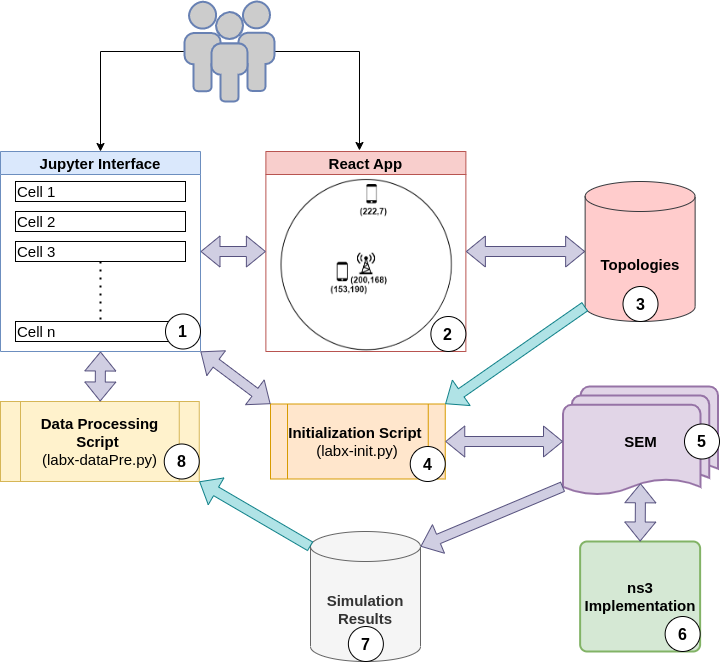|
<a id='fig1'><p style="text-align: center;"><b>Figure. 1: Simulation interface in TTM4133 Labs.</b></p></a>

The interaction and information flow for a typical lab is shown in <b>steps 1</b> uptil <b>8</b>.

1. Step <b>1</b> is the lab interaction, using the jupyter interface,
2. Step <b>2</b> is the topology design, using the react application,
3. Step <b>3</b> is the saving of created topologies,
4. Step <b>3</b> is the invocation of the `labx-init.py` script, which will retrieve any saved topologies and start the ns-3 simulations,
5. Step <b>5</b> corresponds to the execution management of simulations using ([sem](https://github.com/signetlabdei/sem)), \[no interaction required\]
6. Step <b>6</b> corresponds to the actual ns-3 code implementation and execution, \[no interaction required\]
7. Step <b>7</b> is resulting data from running the simulations, \[no interaction required\]
8. Step <b>8</b> is the invocation of the `labx-dataPre.py` script, which will extract, transform and load the results so they can be analysed in the  jupyter lab interface.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Part 1: Introduction to the Lab Contents and Environment
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

This part encompasses various basic concepts required for getting started and becoming familiar with the operation architecture of labs designed for TTM4133. This includes the structure of the available lab contents (folders and files cloned from github). Following is a description of the lab content template available for each lab:

In this part, we will focus towards the overall design of the labs in TTM4133 as well as the utilization of the different modules depicted in <a id='fig1'>[Figure. 1](#fig1)</a>. The structure of the labs can be described as below:

## 1. Lab Structure
The required files for each lab can be cloned from the provided github repository (as shown in the getting started guidelines). The labs will consist of the following general template:

- Description and learning objectives
- Introduction of concepts and necessary information
- Reference information for the utilized data and performance parameters
- Different parts and tasks covering the learning objectives
- Exercises to test the learning objectives

Each part of the lab consists of various tasks to be completed in order to answer the forthcoming exercises. Several parameters are also specified for different simulations scenarios in order to achieve uniform results.

## 2. Lab Topology Design
The topologies are designed using a [React](https://reactjs.org/) application available in the VMs provided to each group. The application can be accessed at http://vm-public-ip:3000/ using any browser (while connected to the NTNU network). The interface of this application will be similar to what is shown in <a id='fig2'>[Figure. 2](#fig2)</a>. 

| |
|---|
![test-lab0.png](Figures/test-lab0.png)
<a id='fig2'><p style="text-align: center;"><b>Figure. 2: React application interface.</b></p></a>

The interface is meant to be simple and intuitive with several inputs for the simulation parameters like transmit power and the design elements such as users, base stations, and buildings. The transmit power dictates the coverage of the each cell as shown in the <a id='fig2'>[Figure. 2](#fig2)</a>. 

> <b>Note:</b> There will be different input parameters for each lab based on the scenario and learning objectives.


## 3. Lab Content Structure
The labs will be made available in a public repository with the following structure (<a id='fig3'>[Figure. 3](#fig3)</a>):

| |
|---|
|![lab0-direct-struct.png](Figures/lab0-direct-struct.png)|
<a id='fig3'><p style="text-align: center;"><b>Figure. 3: Directory structure (a) repository, (b) lab0 folder content.</b></p></a>

Each lab has its own directory, entitled **labx** for organization of its contents as shown in <a id='fig3'>[Figure. 3a](#fig3)</a>. The ns-3 simulation scripts are provided in **ns3_scripts** and are to be copied to <u>/home/ubuntu/repos/ns3/scratch</u> before a lab begins. Moreover, the lab itself consists of the following sub-folders:
- **Modules** contains the python files including `labx-init.py` and `labx-dataPre.py` to run simulations and process the results (to be executed from jupyter notebooks)
- **Figures** contains the required graphics for the jupyter notebooks (should not be modified)
- **Results** created by jupyter notebook at runtime and contains the saved simulation results
- `labx.ipynb` actual notebook file for the lab (to be interacted with during the lab)

## 4. Simulation Modules
The simulation starts with the execution of a `labx-init.py`. The script is responsible for extracting the topology created by the react application, preparing the required parameters for ns-3 simulation and creation of templates and functions for the execution using sem framework. After the successful completion of a simulation, the `labx-dataPre.py` handles the results and presents them in a visually cleaner manner for the jupyter notebooks.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Part 2: Analyzing a pre-built simulation
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  ## 1. An example pre-built topology
In this part, we will run a simulation using a topology generated using the react application (as shown in <a id='fig4'>[Figure. 4](#fig4)</a>).

| |
|---|
|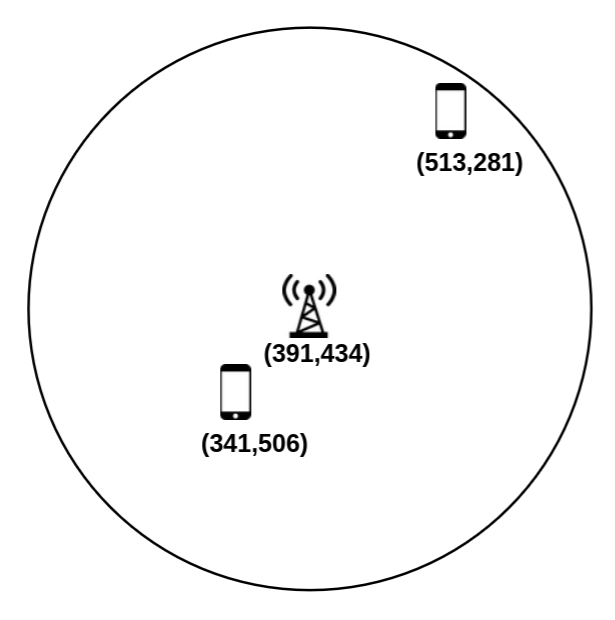|
<a id='fig4'><p style="text-align: center;"><b>Figure. 4: A simple cellular topology.</b></p></a>


The topology consists of a base station serving two users located close and away from the transmitting base station respectively. In the following cell, we will execute the `first-sim.py` that has the topology shown in <a id='fig4'>[Figure. 4](#fig4)</a>. 

> **Note:** Since this is a pre-built topology, we do not need to run the react application for this simulation. 

### 1.1 Running the simulation script

In [1]:
%run -i 'Modules/first-sim.py'

User Received Power simulation started...


Running simulations: 100%|██████████| 1/1 [00:02<00:00,  2.12s/simulation]


User Received Power simulation finished!


Running simulations: 100%|██████████| 1/1 [00:02<00:00,  2.32s/simulation]


Throughput simulation started...


Running simulations: 100%|██████████| 1/1 [00:02<00:00,  2.19s/simulation]

Throughput simulation finished!
All the simulations have been completed successfully...


From the output, it is evident that we have run multiple simulations. Each simulation collects results related to the **User Received Power** (which includes the Signal-to-interference-plus-noise ratio, SINR) and **User Throughput** from the ns-3 simulator via the *sem* module. 

The python file `first-sim.py` uses the *sem* python library to run the ns-3 simulation and the results are returned in a variable named **result_X**.

X can be replaced by "signalpower", "sinr" or "throughput", as seen in the next step.

### 1.2 Results of the first simulation
After the completion of the script, we can analyze the results of the simulation using the following variables:

- **result_signalpower:** provides information regarding received signal power and signal quality for cellular users. 
- **result_sinr:** provides information regarding received signal power and interference experienced by the cellular users. 
- **result_throughput:** provides information regarding averaged user throughput in downlink and uplink for cellular users.

Each of the variables contains a list of simulation runs (1 *item* per repetition), which in turn has a dictionary with several *keys*.
A particularly relevant *key* is 'output', which will contain a "space separated values" format (more details later).

#### An example for the result_throughput variable

In [2]:
## Looks ugly but it will get better
#result_throughput[0]

#result_throughput[0].keys()

result_throughput[0]['output']

## Python revision question: what does the '[0]' stand for?
# You take the first element from the result throughput list.

{'stdout': '# time      Tput-UE0(Mbps)      Tput-UE1(Mbps)\n  0.1            0                   0\n 0.16            0                   0\n 0.22            0                   0\n 0.28     0.260417            0.260417\n 0.34      2.08333             2.08333\n  0.4      1.95312             1.95312\n 0.46      2.08333             2.08333\n 0.52      1.95312             1.95312\n 0.58      2.08333             2.08333\n 0.64      1.95312             1.95312\n  0.7      2.08333             2.08333\n 0.76      1.95312             1.95312\n 0.82      2.08333             2.08333\n 0.88      2.08333             2.08333\n 0.94      1.95312             1.95312\n    1      2.08333             2.08333\n 1.06      1.95312             1.95312\n 1.12      2.08333             2.08333\n 1.18      1.95312             1.95312\n 1.24      2.08333             2.08333\n  1.3      1.95312             1.95312\n 1.36      2.08333             2.08333\n 1.42      1.95312             1.95312\n 1.48      2.08333  

#### An example for the result_sinr variable (digging deeper)

In [3]:
## This one handles data a bit further (just a nicer print)
print(result_sinr[-1]['output']['stdout'][0:545])

## Other things to try
print(result_sinr[-1]['output'].keys())
print(result_sinr[-1]['output']['stderr']) # <-- should be an empty string


## Python revision question: what does the '[-1]' stand for?
# Last element from the list
## Python revision question: what does the '[0:545]' stand for?
# The first 545 elements from the list 0-544

#     time  cellID    rnti        rsrp        sinr
  0.200214      1      0       0.000000      29.052555
  0.200214      1      0       0.000000      30.060357
  0.201214      1      0       0.000000      29.052555
  0.201214      1      0       0.000000      30.060357
  0.202214      1      0       0.000000      29.052555
  0.202214      1      0       0.000000      30.060357
  0.203214      1      0       0.000000      29.052555
  0.203214      1      0       0.000000      30.060357
  0.204214      1      0       0.000000      29.052555
dict_keys(['stdout', 'stderr'])



### 1.3 Extracting and Transforming the simulation results
Evidently, the data is unstructured with various different parameters including information about the users, their received power levels and the actual timing of the simulation. This data can be extracted and transformed using another python script `lab0-dataPre.py`. The objective is to organize the simulation data into pandas dataframes for convenience and ease of access (e.g., further transformations or loading into other scripts).

> **Curiosity:** are you familiar with the term [ETL](https://en.wikipedia.org/wiki/Extract,_transform,_load)? 

In [4]:
## Note: This script will 
%run -i 'Modules/lab0-dataPre.py'

The clean data is made available in **res_signalpower**, **res_sinr**, and **res_throughput** variables and can be displayed as follows: 

In [5]:

print(50*"#"+'\n{:^50}\n'.format("These are the Throughput results")+50*"#")
display(res_throughput)

print(50*"#"+'\n{:^50}\n'.format("These are the Signal Power results")+50*"#")
display(res_signalpower)

print(50*"#"+'\n{:^50}\n'.format("These are the SINR results")+50*"#")
display(res_sinr)

##################################################
         These are the Throughput results         
##################################################


,time,tput1,tput2
0,0.1,0.000000,0.000000
1,0.16,0.000000,0.000000
2,0.22,0.000000,0.000000
3,0.28,0.260417,0.260417
4,0.34,2.083330,2.083330
...,...,...,...
110,6.7,2.083330,2.083330
111,6.76,1.953120,1.953120
112,6.82,2.083330,2.083330
113,6.88,2.083330,2.083330


##################################################
        These are the Signal Power results        
##################################################


,time,sig_power,sig_quality,uid
0,0.4,-102.180239,-3.015698,user00
1,0.6,-102.180239,-3.015698,user00
2,0.8,-102.180239,-3.015698,user00
3,1.0,-102.180239,-3.015698,user00
4,1.2,-102.180239,-3.015698,user00
...,...,...,...,...
28,6.0,-101.172437,-3.014581,user01
29,6.2,-101.172437,-3.014581,user01
30,6.4,-101.172437,-3.014581,user01
31,6.6,-101.172437,-3.014581,user01


##################################################
            These are the SINR results            
##################################################


,time,sinr,uid
0,0.261214,29.052555,user00
1,0.262214,29.052555,user00
2,0.263214,29.052555,user00
3,0.264214,29.052555,user00
4,0.265214,29.052555,user00
...,...,...,...
6729,6.995214,30.060357,user01
6730,6.996214,30.060357,user01
6731,6.997214,30.060357,user01
6732,6.998214,30.060357,user01


In [6]:
## Verify the type of each variable
print('Throughput results: {}'.format(type(res_throughput)))
print('Signal power results: {}'.format(type(res_signalpower)))
print('SINR results: {}'.format(type(res_sinr)))

## More information about Pandas DataFrames after the milestone

Throughput results: <class 'pandas.core.frame.DataFrame'>
Signal power results: <class 'pandas.core.frame.DataFrame'>
SINR results: <class 'pandas.core.frame.DataFrame'>


---
---
### Milestone 1

Before proceeding **call your TA** to make sure everything went as expected.


---
---

### 1.4 Introducing Pandas 🐼

Pandas is an open source Python package that is most widely used for data science/data analysis (e.g., ETL) and machine learning tasks. The purpose of this framework is to provide a simple and compact way of parsing large quantities of data. One of the most used tools in Pandas is the so called dataframe, introduced hereafter.

A pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A DataFrame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. It consists of three principal components, the data, rows, and columns. Before using it, you have to include <a href="https://pandas.pydata.org/">pandas</a> library in your own python code (i.e., `import pandas as pd`).

---
#### 1.4.1 Basic DataFrame Operations

We will start by creating a simple DataFrame.


In [7]:
import pandas as pd

new_df = pd.DataFrame() #to create an empty dataframe

In [8]:
my_dict= {
    'key_1' :  ["This is a string", "Mean", "Maximum"],
    'key_2' :  [    1,     2,    3]
}

my_df = pd.DataFrame(my_dict) #to create a dataframe based on the dictionary "my_dict"

display(my_df)

,key_1,key_2
0,This is a string,1
1,Mean,2
2,Maximum,3


lation and the results are returned in a variable named resul---
Now, we will analyse the variance, maximum and minimum values for each entry.

You can try using `display()` or `print()` for a better comprehension. 

In [9]:
min_val = my_df['key_2'].min()  #it provides the minimum value of the column "key_2" of the dataframe "my_df"

mean_val = my_df['key_2'].mean() #it provides the mean value of the column "key_2" of the dataframe "my_df"

max_val = my_df['key_2'].max()  #it provides the maximum value of the column "key_2" of the dataframe "my_df"

var_val = my_df['key_2'].var()  #it provides the variance of the column "key_2" of the dataframe "my_df"

print(f"minimum:\t{min_val}\naverage:\t{mean_val}\nmaximum:\t{max_val}\nvariance:\t{var_val}")

minimum:	1
average:	2.0
maximum:	3
variance:	1.0


---
There are **many** other features that you can explore with pandas, we will introduce only two other examples, "filtering" and "concatenation".


In [10]:
filtered_df = my_df.loc[my_df['key_2'] == 2] #to filter only those entries with value "2" in the column "key_2" of the dataframe "my_df". Save the new dataframe in "filtered_df"
display(filtered_df)

,key_1,key_2
1,Mean,2


In [11]:
final_df = pd.DataFrame(my_dict)
final_df = pd.concat([final_df, filtered_df], ignore_index=True) #to append a dataframe into another one
display(final_df)

,key_1,key_2
0,This is a string,1
1,Mean,2
2,Maximum,3
3,Mean,2


---
---
#### 1.4.2 Using pandas DataFrames with simulation data

Before creating our new DataFrames we must understand better the data we are handling.

Considering the pre-processed results from the previous simulation (point [1.3](#1.3-Extracting-and-Transforming-the-simulation-results)), we have considered three different types of information: throughput (__res_throughput__), power (__res_signalpower__) and SINR (__res_sinr__) for each user. Each of them have in common:
- the column __time__ that represents each instant of time where the simulation was carried out;
- a column with the measured values for the variable in question.

In __res_throughput__ the aggregated throughput per user is reported (i.e., the downlink plus uplink bit rate, in Mbps) in the columns __tput1__ and __tput2__ for _user1_ and _user2_ respectively.

The __res_signalpower__ and __res_sinr__ results include the column __uid__ that represents the id of the user associated to the corresponding measurement.

In addition, the __res_signalpower__ has two distinct measurements:
- _signalpower_: representing the Reference Signal Received Power (RSRP);
- _signalquality_: representing the Reference Signal Reference Quality (RSRQ).

> **Note:** if needed, revisit RSRP and RSRQ in pages 261 and 262 of the book.


#### 1.4.3 Data Parsing
<a id='DataParsing143'></a>

Focusing on the data from the variables __res_throughput__, __res_signalpower__ and __res_sinr__ you are requested to alter each dataframe to show min, max, var and average values.


**Note:** We could combine the dataframes toghether but due to how NS3 produces the results with differnet timeframes, and differnet format in the case of __res_throughput__ it might be easier to just work on each dataframe separatly.

You should obtain something similar to what is shown below (for each one of the 3 data frames):

<img src= "Figures/1.4.3example.PNG" alt="first" class="bg-primary mb-1" width="400px">

In [12]:
# Select all columns except 'time'
df_without_time = res_throughput.drop(columns=['time'])

# Find the average of each column
average = df_without_time.mean()

# Find the min of each column
minimum = df_without_time.min()

# Find the variance of each column
variance = df_without_time.var()

# Find the max of each column
maximum = df_without_time.max()

# Create a dataframe from the statistics
statistics = pd.concat([average, minimum, variance, maximum], axis=1)

# Rename the columns
statistics.columns = ['average', 'minimum', 'variance', 'maximum']

display(statistics)

,average,minimum,variance,maximum
tput1,1.955386,0.0,0.134438,2.08333
tput2,1.955386,0.0,0.134438,2.08333


In [23]:
# Now for signalpower.

# Select all columns except 'time'
df_without_time = res_signalpower.drop(columns=['time'])
display(df_without_time)

#Group the dataframe by uid
df_grouped = df_without_time.groupby('uid')


# Hint: Aggregate data https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html#how-to-calculate-summary-statistics
df_aggregate = df_grouped.agg({'sig_power': ['mean','min','var','max', 'std'], 'sig_quality': ['mean','min','var','max', 'std']})

display(df_aggregate)

,sig_power,sig_quality,uid
0,-77.550487,-3.010319,user00
1,-77.550487,-3.010319,user00
2,-77.550487,-3.010319,user00
3,-77.550487,-3.010319,user00
4,-77.550487,-3.010319,user00
5,-77.550487,-3.010319,user00
6,-77.550487,-3.010319,user00
7,-77.550487,-3.010319,user00
8,-77.550487,-3.010319,user00
9,-77.550487,-3.010319,user00


sig_power                                 sig_quality                 \
             mean        min  var        max  std        mean       min  var   
uid                                                                            
user00 -77.550487 -77.550487  0.0 -77.550487  0.0   -3.010319 -3.010319  0.0   

                       
             max  std  
uid                    
user00 -3.010319  0.0

In [14]:
# Now for the last dataframe

# Select all columns except 'time'
df_without_time = res_sinr.drop(columns=['time'])

#Group the dataframe by uid
df_grouped = df_without_time.groupby('uid')


# Hint: Aggregate data https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html#how-to-calculate-summary-statistics
df_aggregate = df_grouped.agg({'sinr': ['mean','min','var','max', 'std']})

display(df_aggregate)

sinr                                
             mean        min  var        max  std
uid                                              
user00  29.052555  29.052555  0.0  29.052555  0.0
user01  30.060357  30.060357  0.0  30.060357  0.0

#### 1.4.4 Exercises

<b>Question 1.4.4a</b>: 
Explain the meaning of RSRP and RSRQ and their relationships. 

<b>Question 1.4.4b</b>: 
Take a look on the variance results for RSRP and RSRQ for both the users. Which is the meaning of those values?

---
---
### Milestone 2

After completing the exercise, **call your TA** to make sure everything went as expected and then proceed with the lab. 

---
---
### 1.5 Data Visualization for User Throughput

We can now use a graphing library from python to plot and visualize the obtained results.

In the following code cells you are required to fill the gaps (you have to replace `#TODO` with the correct value).

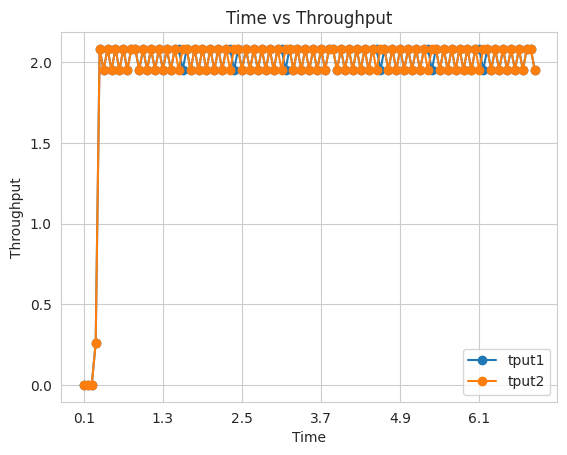

In [15]:
import matplotlib.pyplot as plt

#Create the plot
res_throughput.plot(x='time', y=['tput1', 'tput2'], style='-o')

#Labels
plt.xlabel('Time')
plt.ylabel('Throughput')
plt.title('Time vs Throughput')

#Show the plot
plt.show()

As can be seen, at least two things can be noticed: 
- the behaviour of throughput is not constant;
- at simulation time zero, the throughput is zero. 


<b>Question 1.5a</b>: Why is the throughput initially zero for both users?
> Note: Consider packet communication basics and queuing in your thought process.

<b>Question 1.5b</b>: Can you deduce that one user is closer to the eNB than the other by looking at the throughput, if so, how?

### 1.6 Visualization for Signal Power and Quality

Let's know consider the other dataframes, i.e. __res_signalpower__ and __res_sinr__. Try to do the same as before, and in particular:
- display two distinct plots, one for the _Received Signal Power_ and the other for _Received Signal Quality_;
- label both x-axis _Simulation Time (s)_;
- for each plot, report the pattern for each user;

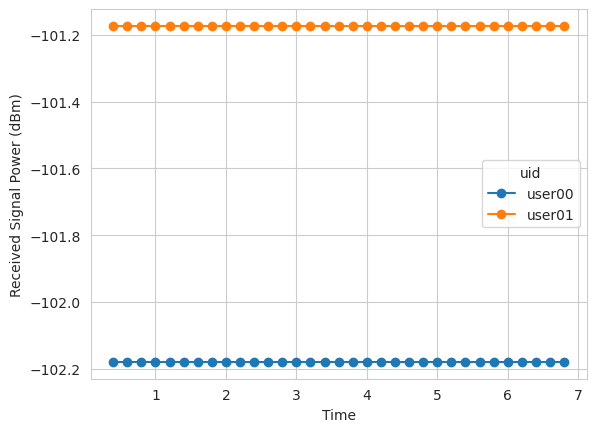

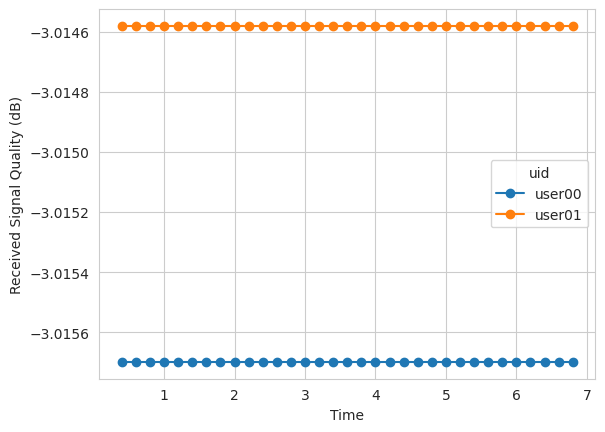

In [16]:
# Pivot the dataframe to create separate columns for each user
res_signalpower_pivot = res_signalpower.pivot(index='time', columns='uid', values='sig_power')
res_signalquality_pivot = res_signalpower.pivot(index='time', columns='uid', values='sig_quality')


# Plot the data for each column separately

# Plot the signal power
res_signalpower_pivot.plot(kind='line', style='-o')
plt.xlabel('Time')
plt.ylabel('Received Signal Power (dBm)')


# Plot the signal quality
res_signalquality_pivot.plot(kind='line', style='-o')
plt.xlabel('Time')
plt.ylabel('Received Signal Quality (dB)')


plt.show()

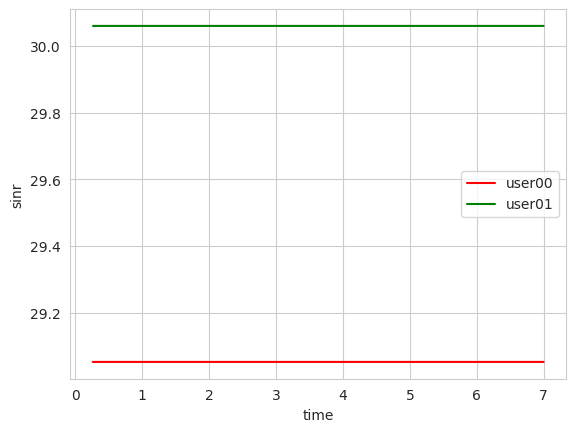

In [17]:
# Now try to do the same with res_sinr

# Group the data by 'uid' (this has already been covered in the lab)
groups = res_sinr.groupby('uid')
colors = {'user00': 'red', 'user01': 'green'}

# Plot the data for each group
for name, group in groups:
    plt.plot(group['time'], group['sinr'], label=name, color = colors[name])

# Labels and show plot
# TODO
plt.xlabel('time')
plt.ylabel('sinr')
plt.legend()
plt.show()

### Summary of Part 2:

In this section, try to summarize what you have done up to now. You are requested to discussall the results obtained as shown above. Share your insights about the simulated topology and any interesting observations.

---
---
### Milestone 3

Before proceeding **call your TA** to make sure everything went as expected.


---
---
# Part 3: Designing a React Topology based Simulation
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Creation of the React Topology
We will now utilize the react application to design a simple simulation scenario depicted in <a id='fig5'>[Figure. 5](#fig5)</a>. The topology consists of a single base station, a cellular user and a building in the cellular environment.  

| |
|---|
<img src= "Figures/blueprintlab0.png" alt="first" class="bg-primary mb-1">
<a id='fig5'><p style="text-align: center;"><b>Figure. 5: A blueprint for the react topology.</b></p></a>

The application can be accessed at http://vm-public-ip:3000/ using any browser. A visualization of the react interface is provided in <a id='fig2'>[Figure. 2](#fig2)</a>. Follow the steps as below to create the topology in react application:
- Select the **lab0** button in the main react interface.
- In the topology design, include the required nodes by using the **Add UE** for user, **Add eNB** for base station and **Add Building** for building.
- Drag the nodes in order to approximately match the blueprint design provided in <a id='fig5'>[Figure. 5](#fig5)</a>.
- Afterwards, add a value for the transmit power of the base station (between the given range)
- Provide a name **using only letters and numbers** for the topology and Press the **Save** button.

After these steps, the react interface can be safely closed.

## 2. Running a simulation using the React Topology
We will now utilize the `lab0-init.py` to:

1. Integrate the newly designed topology into the ns-3 simulation setup,
2. Use *sem* to run the actual simulations,
3. Save the results for further processing. 

> __NOTE:__ if everything was done properly, you should see the name of your saved topology after running the following code block.


In [18]:
%run -i 'Modules/lab0-init.py'

List of created simulations: 
 
3dot
3dot1



List the simulation to run:  3dot1
Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image 3dot1.png" alt = "test pic" style="background-color: white;"> 

Signal Power Received simualtions...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.58s/simulation]


Simulation 1 finished!
SINR simualtions...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.64s/simulation]


Simulation 2 finished!
Throughput simualtions...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.56s/simulation]

Simulation 3 finished!
Simulations finished


The output from the `lab0-init.py` displays the topology saved using the react app as well as the location of different nodes. Moreover, the simulations are run afterwards for calculating signal power related parameters for the UEs in the topology.

The remaining the process of data cleaning and visualization of the obtained simulation results is similar to what was earlier provided.

In [19]:
## Unprocessed data

print(result_signalpower[-1]['output']['stdout'][0:545])
print(result_sinr[-1]['output']['stdout'][0:545])
print(result_throughput[-1]['output']['stdout'][0:545])

#     time  cellID    rnti        rsrp        rsrq
  0.200000      1      0     -77.550487           -nan
  0.400000      1      1     -77.550487      -3.010319
  0.600000      1      1     -77.550487      -3.010319
  0.800000      1      1     -77.550487      -3.010319
  1.000000      1      1     -77.550487      -3.010319
  1.200000      1      1     -77.550487      -3.010319
  1.400000      1      1     -77.550487      -3.010319
  1.600000      1      1     -77.550487      -3.010319
  1.800000      1      1     -77.550487      -3.010319
#     time  cellID    rnti        rsrp        sinr
  0.200214      1      0       0.000000      53.605907
  0.201214      1      0       0.000000      53.605907
  0.202214      1      0       0.000000      53.605907
  0.203214      1      0       0.000000      53.605907
  0.204214      1      0       0.000000      53.605907
  0.205214      1      0       0.000000      53.605907
  0.206214      1      0       0.000000      53.605907
  0.207214      1 

### 2.1 Cleaning of simulation results

In [21]:
%run -i 'Modules/lab0-dataPre.py'

In [22]:
display(res_signalpower)
display(res_sinr)
display(res_throughput)

,time,sig_power,sig_quality,uid
0,0.4,-77.550487,-3.010319,user00
1,0.6,-77.550487,-3.010319,user00
2,0.8,-77.550487,-3.010319,user00
3,1.0,-77.550487,-3.010319,user00
4,1.2,-77.550487,-3.010319,user00
5,1.4,-77.550487,-3.010319,user00
6,1.6,-77.550487,-3.010319,user00
7,1.8,-77.550487,-3.010319,user00
8,2.0,-77.550487,-3.010319,user00
9,2.2,-77.550487,-3.010319,user00


,time,sinr,uid
0,0.261214,53.605907,user00
1,0.262214,53.605907,user00
2,0.263214,53.605907,user00
3,0.264214,53.605907,user00
4,0.265214,53.605907,user00
...,...,...,...
6734,6.995214,53.605907,user00
6735,6.996214,53.605907,user00
6736,6.997214,53.605907,user00
6737,6.998214,53.605907,user00


,time,tput1
0,0.1,0.00000
1,0.16,0.00000
2,0.22,0.00000
3,0.28,0.78125
4,0.34,4.03646
...,...,...
110,6.7,4.03646
111,6.76,4.03646
112,6.82,4.03646
113,6.88,4.16667


#### <u>Question 2.1a</u>: 
Why is there only one UE in the observed results? 

---
---
### Milestone 4

Before proceeding **call your TA** to make sure everything went as expected.


---
### Exercise 2.2: Visualization simulation results

Similarly to what was already done the Part 2, further parse the obtained data so you can analyse it.

---
#### 2.2.1 Data Parsing

As done in [Section 1.4.3](#DataParsing143), obtain some basic statistics (e.g., mean, minimum and maximum values) for throughput, SINR, RSRP and RSRQ.

In [44]:
# Select all columns except 'time'
# TODO
#con_df = pd.concat([res_signalpower, res_sinr, res_throughput], axis=1) #to append a dataframe into another one
#df_without_time = con_df.drop(columns=['time', 'uid'])
display(df_without_time)
#Group the dataframe by uid
#df_grouped = df_without_time.groupby('uid')

# Hint: Aggregate data https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html#how-to-calculate-summary-statistics


# Find the average of each column
#average = df_without_time.mean()

# Find the min of each column
# TODO

# Find the variance of each column
# TODO

# Find the max of each column
# TODO
df_aggregate = df_without_time.agg({'sig_power': ['mean','min','var','max'], 'sig_quality': ['mean','min','var','max'], 'sinr': ['mean','min','var','max'], 'tput1': ['mean','min','var','max']})

display(df_aggregate)


# Create a dataframe from the statistics
#statistics = pd.concat([average, minimum, variance, maximum], axis=1)

# Rename the columns
#statistics.columns = # TODO

#display(statistics)

,sig_power,sig_quality,sinr,tput1
0,-77.550487,-3.010319,53.605907,0.00000
1,-77.550487,-3.010319,53.605907,0.00000
2,-77.550487,-3.010319,53.605907,0.00000
3,-77.550487,-3.010319,53.605907,0.78125
4,-77.550487,-3.010319,53.605907,4.03646
...,...,...,...,...
6734,NaN,NaN,53.605907,NaN
6735,NaN,NaN,53.605907,NaN
6736,NaN,NaN,53.605907,NaN
6737,NaN,NaN,53.605907,NaN


,sig_power,sig_quality,sinr,tput1
mean,-77.550487,-3.010319,5.360591e+01,3.913045
min,-77.550487,-3.010319,5.360591e+01,0.000000
var,0.000000,0.000000,5.049459e-29,0.507688
max,-77.550487,-3.010319,5.360591e+01,4.166670


In [ ]:
# Now for signalpower and signalquality

# Select all columns except 'time'
df_without_time = res_signalpower.drop(columns=['time'])

#Group the dataframe by uid
## TODO

# Aggregate data
# TODO

display(df_aggregate)

In [ ]:
# SINR data

# Select all columns except 'time'
df_without_time = res_sinr.drop(columns=['time'])

#TODO...

---
#### 2.2.2 Data Ploting

Create three plots, each representing the behavior of RSRP, RSRQ and SINR over the simulation time.

In [ ]:
# TODO

# Hint: Section 1.6

### 2.3 Testing the theoretical understanding...
> Note: Consider the studied concepts and a general understanding if mobile cellular communications to answer.

#### <u>Question 2.3a</u>: 
Name at least 3 advantages and disadvantages with using a mobile cell and cellular environments.

#### <u>Question 2.3b</u>: 
Is it reasonable to expect cells to have a perfect circle as its cover area (like drawn in the webapp)?

#### <u>Question 2.3c</u>: 
List at least three factors that could impact the signal in a real life scenario.

---
---
### Milestone 5 / Summary of Part 3

Before finishing **call your TA** to make sure everything went as expected.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------